# Вторая задача

In [2]:
import numpy as np
from scipy import stats
from matplotlib import pyplot
import seaborn as sns

In [3]:
n = 25
x = []

for i in range(0, n):
    x.append(np.random.exponential(scale = 1))
    

## Мода, медиана, размах, коэффициент асимметрии

In [4]:
X = x.copy()
X.sort()

median = np.median(x)
mode = stats.mode(x)[0][0]
spread = np.max(x) - np.min(x)
mean = np.mean(x)

m3 = 0
m2 = 0
for i in range (0, n):
    m3 += 1/n*(x[i] - mean)**3
    m2 += 1/n*(x[i] - mean)**2

asymmetry = m3/(m2**1.5)


print('Медиана: ', median, '\nМода: ', mode, '\nРазмах: ', spread, '\nКоэффициент асимметрии', asymmetry)

Медиана:  0.8921367093145579 
Мода:  0.022127274495021946 
Размах:  2.4351344551017298 
Коэффициент асимметрии 0.5652365119278143


## Эмпирическая функция распределения, гистограмма и boxplot

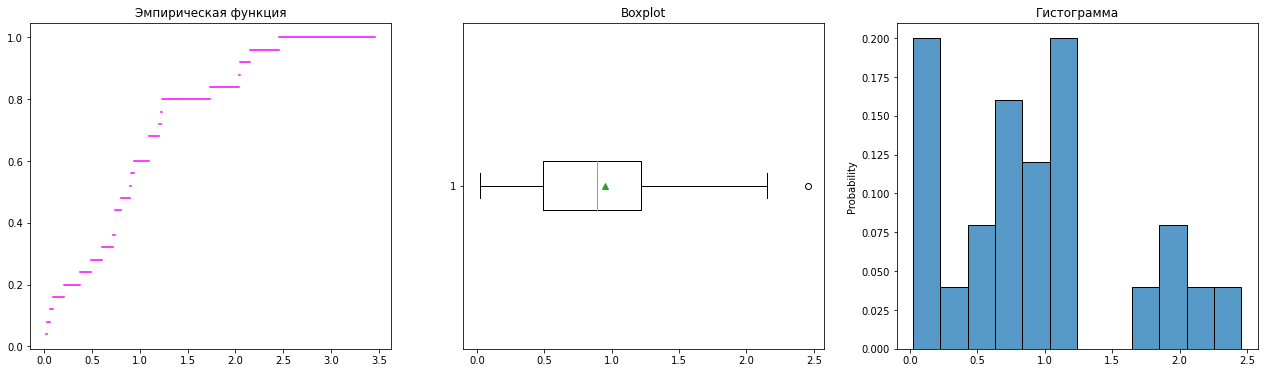

In [13]:
fg, ax = pyplot.subplots(1, 3, figsize = (22,6))

y = np.linspace(1/n, 1, n)
X.append(np.max(X)+1)
#ax[0].bar(X, y, linewidth = 0, edgecolor = 'white')
for i in range (0, n):
    ax[0].plot([X[i], X[i+1]], [y[i], y[i]], color = 'magenta')

sns.histplot(x, bins = int(n/2), stat = 'probability', common_norm = 1)

ax[1].boxplot(x, vert = False, showfliers = True, showmeans = True, showcaps = True, showbox = True);

ax[0].set_title('Эмпирическая функция')
ax[1].set_title('Boxplot')
ax[2].set_title('Гистограмма');

## Ядерная оценка плотности распределения

In [14]:
def q(y):
    if np.abs(y) >= 1:
        return 0
    else:
        return 0.75*(1-y**2)

Text(0.5, 1.0, 'KDE')

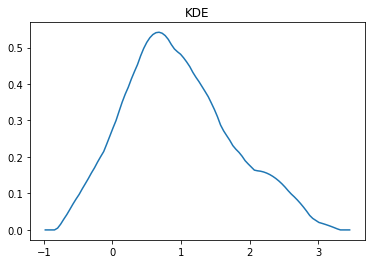

In [15]:
s = (m2*n/(n-1))**0.5
h = 2.344*s/(n**0.2)

sz = 100
kde = []
z = np.linspace(np.min(x)-1, np.max(x)+1, sz)
for i in range(0, sz):
    k = 0
    for j in range(0, len(x)):
        k += q((z[i]-x[j])/h)
    kde.append(k/(n*h))

pyplot.plot(z, kde)
pyplot.title('KDE')

## Бутстраповская оценка плотности распределения среднего арифметического

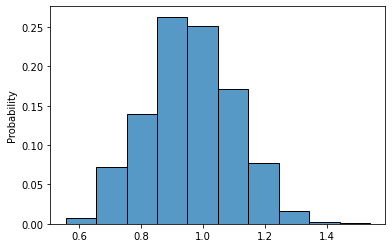

In [16]:
means = []

for s in range (0, 1000):
    i = np.random.randint(0, n, n)
    xi = []
    for j in i:
        xi.append(x[j])

    means.append(np.mean(xi))
    

sns.histplot(means, bins = 10, stat = 'probability', common_norm = 1);

## Бутстраповская оценка плотности распределения коэффициента асимметрии

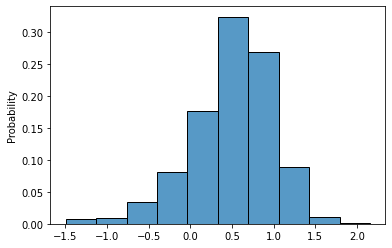

In [17]:
asymmetry = []


for s in range (0, 1000):
    i = np.random.randint(0, n, n)
    xi = []
    for j in i:
        xi.append(x[j])

    for j in range (0, n):
        m3 += 1/n*(xi[j] - mean)**3
        m2 += 1/n*(xi[j] - mean)**2

    asymmetry.append(m3/(m2**1.5))
    m3 = m2 = 0
    

sns.histplot(asymmetry, bins = 10, stat = 'probability', common_norm = 1);